In [1]:
import pandas as pd

df = pd.read_csv('../Datasets/train.csv')

df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [2]:
df.shape

(93686, 3)

In [3]:
# Inspect data
print(df.isnull().sum())

category                 0
sub_category          6591
crimeaditionalinfo      21
dtype: int64


In [4]:
print(df.dtypes)

category              object
sub_category          object
crimeaditionalinfo    object
dtype: object


In [5]:
# Clean up na 
df = df.dropna(subset=['crimeaditionalinfo'])

df['sub_category'].fillna('Unknown', inplace=True)

C:\Users\kalpa\AppData\Local\Temp\ipykernel_10828\2325357611.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sub_category'].fillna('Unknown', inplace=True)


In [6]:
# Count the unknown subcategories added.
df[df['sub_category'] == 'Unknown'].count()

category              6591
sub_category          6591
crimeaditionalinfo    6591
dtype: int64

In [7]:
df[df['sub_category'] == 'Unknown'].head()

,category,sub_category,crimeaditionalinfo
8,RapeGang Rape RGRSexually Abusive Content,Unknown,I got the message on Whatsapp to my number The...
25,RapeGang Rape RGRSexually Abusive Content,Unknown,Respected Sir\r\n\r\nA very serious matter I w...
39,Sexually Explicit Act,Unknown,httpswwwxnxxtvvideousapbfuckkkarrr\r\n\r\n Abo...
45,Sexually Obscene material,Unknown,Many fake accounts are created and Im sufferin...
49,Sexually Explicit Act,Unknown,SirMaam \r\nThis is my third report on this re...


In [8]:
import re

# Define a function to clean text data
def clean_text(text):
    # Remove line breaks (\r\n or \n)
    text = re.sub(r'\r\n|\n', ' ', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# Apply the cleaning function to the 'crimeaditionalinfo' column
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(clean_text)


In [9]:
df.shape #93686 - 93665 = 21 total data removed due to no info

(93665, 3)

In [10]:
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [11]:
# Unique categories and sub-categories
print("Unique categories:", df['category'].nunique())
print("Unique sub-categories:", df['sub_category'].nunique())

Unique categories: 15
Unique sub-categories: 36


In [12]:
# Distribution of categories
print(df['category'].value_counts())

# Distribution of sub-categories
print(df['sub_category'].value_counts())

category
Online Financial Fraud                                  57416
Online and Social Media Related Crime                   12138
Any Other Cyber Crime                                   10877
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64
sub_category
UPI Related Frauds    

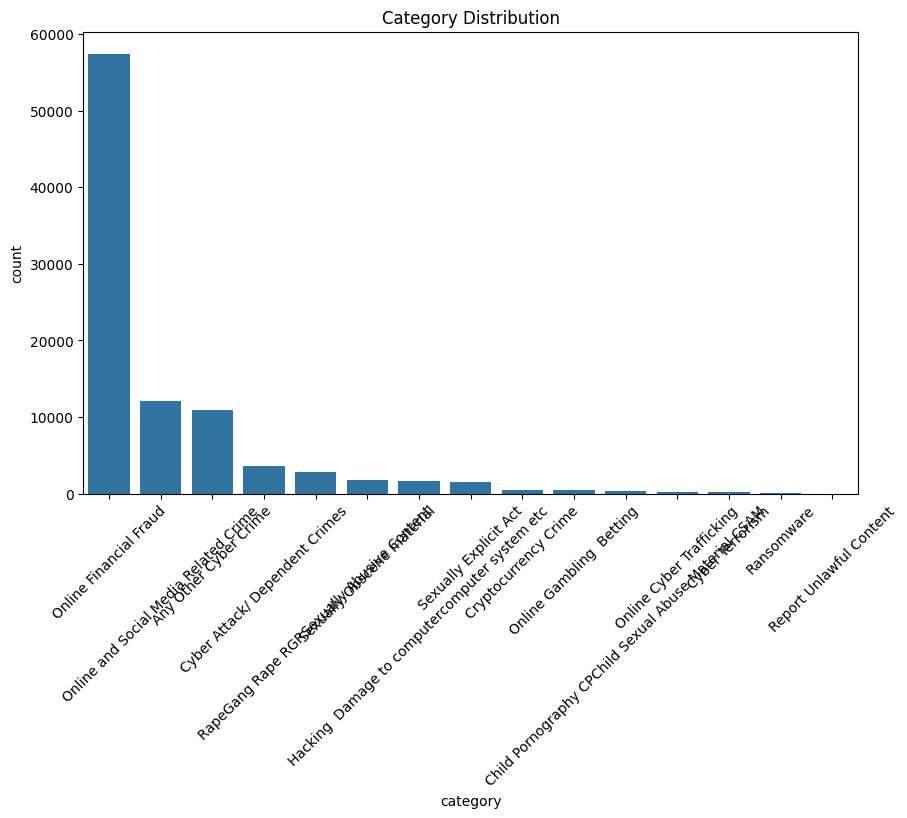

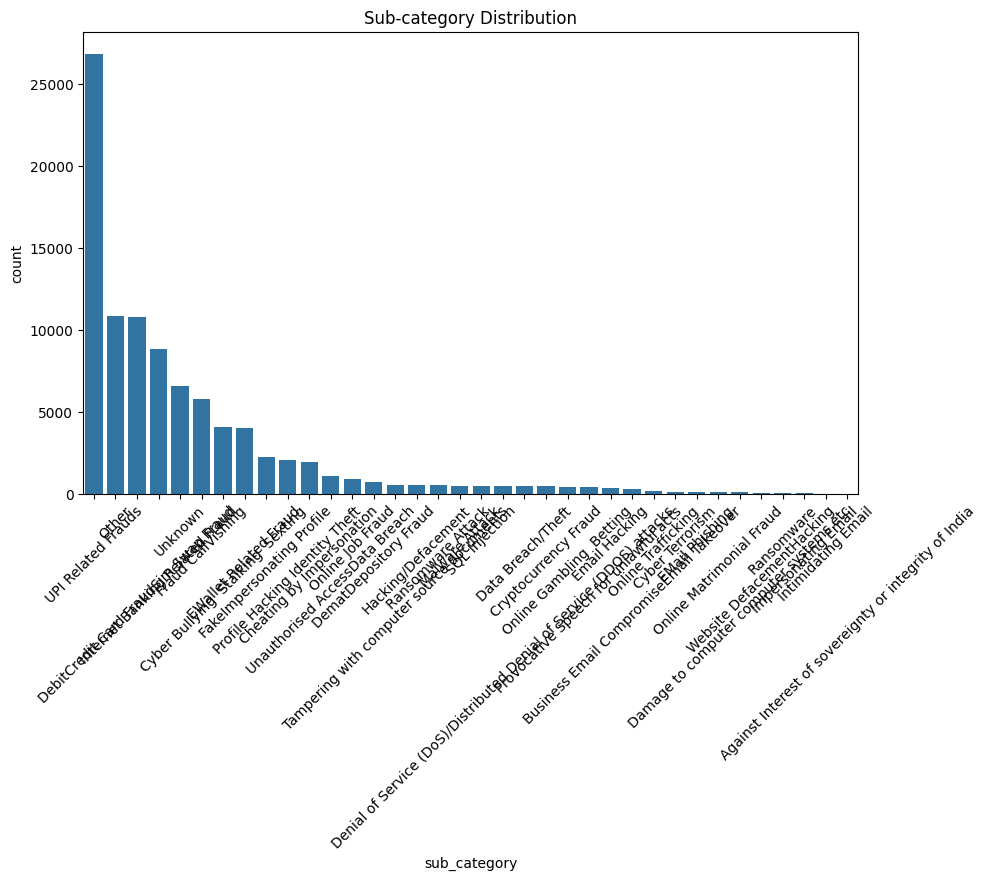

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category', order=df['category'].value_counts().index)
plt.title("Category Distribution")
plt.xticks(rotation=45)
plt.show()

# Plot sub-category distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sub_category', order=df['sub_category'].value_counts().index)
plt.title("Sub-category Distribution")
plt.xticks(rotation=45)
plt.show()


sub_category                                        Against Interest of sovereignty or integrity of India  \
category                                                                                                    
Any Other Cyber Crime                                                                               0       
Child Pornography CPChild Sexual Abuse Material...                                                  0       
Cryptocurrency Crime                                                                                0       
Cyber Attack/ Dependent Crimes                                                                      0       
Cyber Terrorism                                                                                     0       
Hacking  Damage to computercomputer system etc                                                      0       
Online Cyber Trafficking                                                                            0       
Online Financial Fr

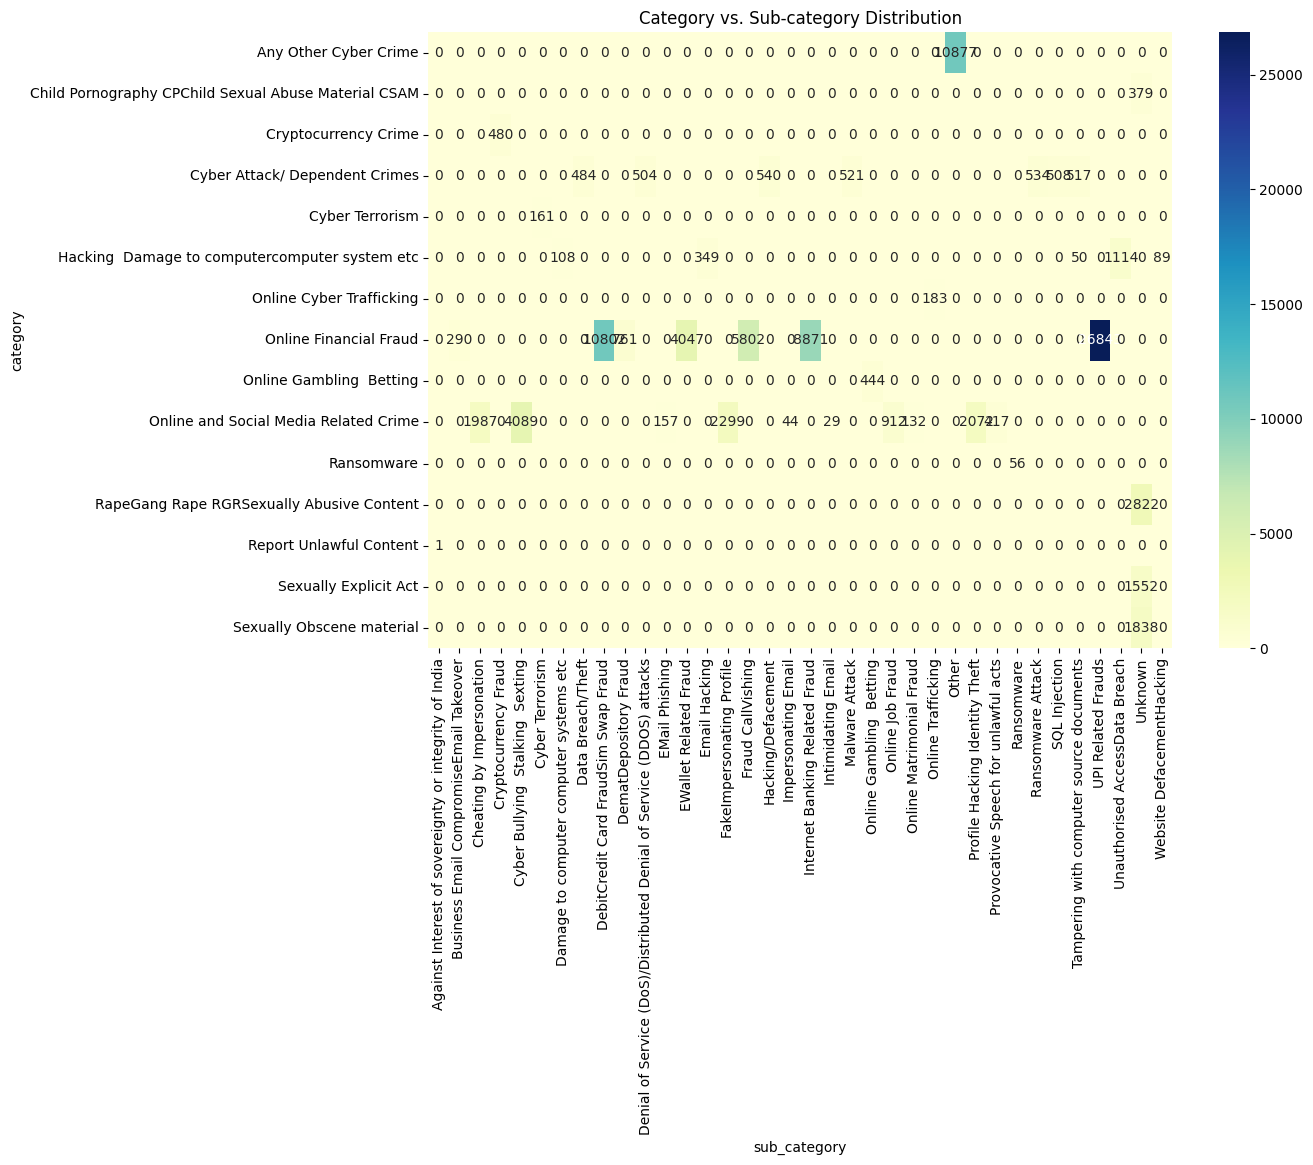

In [14]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['category'], df['sub_category'])

# Display cross-tab
print(cross_tab)

# Plot heatmap of cross-tab
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Category vs. Sub-category Distribution")
plt.show()


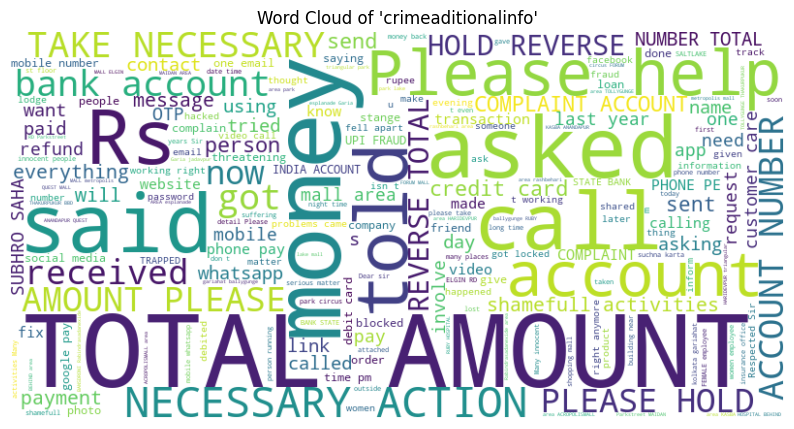

In [15]:
from wordcloud import WordCloud

# Concatenate all text in the 'crimeaditionalinfo' column
text_data = ' '.join(df['crimeaditionalinfo'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of 'crimeaditionalinfo'")
plt.show()


count    93665.000000
mean       384.563508
std        325.766962
min          0.000000
25%        190.000000
50%        277.000000
75%        478.000000
max       1499.000000
Name: text_length, dtype: float64


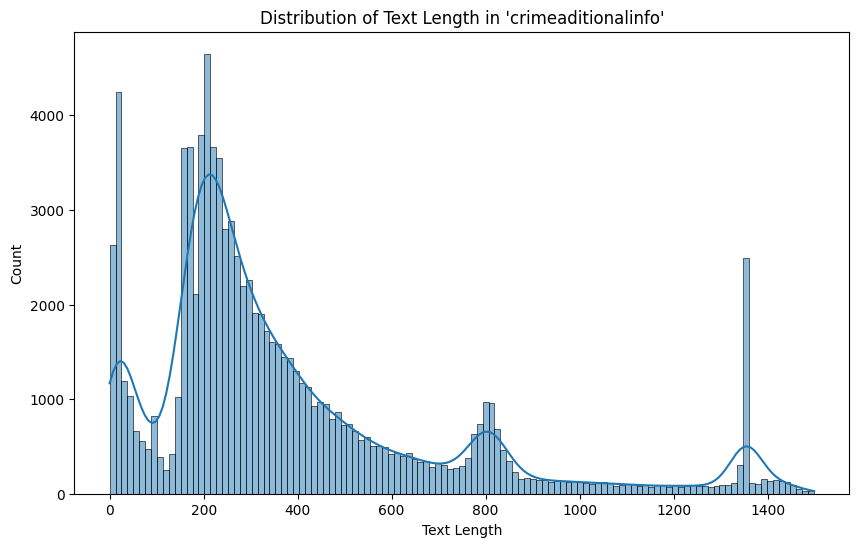

In [16]:
# Calculate lengths of each entry
df['text_length'] = df['crimeaditionalinfo'].apply(len)

# Summary statistics
print(df['text_length'].describe())

# Plot distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], kde=True)
plt.title("Distribution of Text Length in 'crimeaditionalinfo'")
plt.xlabel("Text Length")
plt.show()


In [17]:
df[df['text_length'] > 1000]['category'].nunique()

13

In [18]:
df[df['text_length'] < 1000]['category'].nunique()

15

In [19]:
# Data Cleanup and NLP 

In [20]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

# Example: Tokenize the 'crimeaditionalinfo' column
df['crimeaditionalinfo_tokens'] = df['crimeaditionalinfo'].apply(word_tokenize)


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kalpa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [21]:
# Download stopwords from nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Define stop words
stop_words = set(stopwords.words('english'))

# Remove stop words from tokens
df['crimeaditionalinfo_tokens'] = df['crimeaditionalinfo_tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kalpa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to the tokens
df['crimeaditionalinfo_tokens'] = df['crimeaditionalinfo_tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


In [23]:
df['processed_text'] = df['crimeaditionalinfo_tokens'].apply(lambda x: ' '.join(x))


In [24]:
# Preparing X for Classification
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Use max_features to limit the vector size
X = tfidf_vectorizer.fit_transform(df['processed_text'])


In [25]:
# Preparing Y for Classification
# Combine 'category' and 'sub_category' into a single label for classification
df['category_subcategory'] = df['category'] + '_' + df['sub_category']


In [26]:
# Set Y as the combined 'category_subcategory' column
Y = df['category_subcategory']


In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode labels
Y_encoded = label_encoder.fit_transform(Y)

# You can also check the label mapping
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)


{'Any Other Cyber Crime_Other': np.int64(0), 'Child Pornography CPChild Sexual Abuse Material CSAM_Unknown': np.int64(1), 'Cryptocurrency Crime_Cryptocurrency Fraud': np.int64(2), 'Cyber Attack/ Dependent Crimes_Data Breach/Theft': np.int64(3), 'Cyber Attack/ Dependent Crimes_Denial of Service (DoS)/Distributed Denial of Service (DDOS) attacks': np.int64(4), 'Cyber Attack/ Dependent Crimes_Hacking/Defacement': np.int64(5), 'Cyber Attack/ Dependent Crimes_Malware Attack': np.int64(6), 'Cyber Attack/ Dependent Crimes_Ransomware Attack': np.int64(7), 'Cyber Attack/ Dependent Crimes_SQL Injection': np.int64(8), 'Cyber Attack/ Dependent Crimes_Tampering with computer source documents': np.int64(9), 'Cyber Terrorism_Cyber Terrorism': np.int64(10), 'Hacking  Damage to computercomputer system etc_Damage to computer computer systems etc': np.int64(11), 'Hacking  Damage to computercomputer system etc_Email Hacking': np.int64(12), 'Hacking  Damage to computercomputer system etc_Tampering with com

In [28]:
print(Y_encoded[:10])  # Display the first 10 labels


[26 21 24 31 21 23 21 22 36  0]


In [29]:
# Train and test models below

In [30]:
# TRain test split
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Check the shape of the resulting splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 74932 samples
Test set size: 18733 samples


In [31]:
# trying out simply on logistic regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg_model = LogisticRegression(max_iter=500, random_state=42)

# Train the model
logreg_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = logreg_model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(Y_test, Y_pred))


Accuracy: 54.68%

Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40      2142
           1       0.88      0.17      0.28        84
           2       0.66      0.48      0.55        92
           3       0.08      0.04      0.05       105
           4       0.10      0.05      0.07       114
           5       0.19      0.30      0.23       114
           6       0.09      0.10      0.09       103
           7       0.18      0.17      0.18       115
           8       0.17      0.19      0.18       101
           9       0.12      0.15      0.13       110
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        19
          12       0.57      0.27      0.37        77
          13       0.00      0.00      0.00        13
          14       0.35      0.21      0.26       205
          15       0.00      0.00      0.00        23
          16       0.00      0.00      0

C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [32]:
# TRying out with ramdom forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))

# Confusion Matrix
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(Y_test, Y_pred_rf))


Random Forest Accuracy: 54.43%

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.48      0.41      2142
           1       0.89      0.19      0.31        84
           2       0.89      0.09      0.16        92
           3       0.12      0.13      0.13       105
           4       0.18      0.13      0.15       114
           5       0.20      0.18      0.19       114
           6       0.10      0.12      0.11       103
           7       0.14      0.16      0.15       115
           8       0.13      0.12      0.12       101
           9       0.10      0.10      0.10       110
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        19
          12       1.00      0.09      0.17        77
          13       0.00      0.00      0.00        13
          14       0.38      0.06      0.10       205
          15       0.00      0.00      0.00        23
          16

C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [33]:
# Hypertuning logistic regression
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'saga']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=500, random_state=42), param_grid, cv=5)

# Train the model with grid search
grid_search.fit(X_train, Y_train)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

# Best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model
Y_pred_best = best_model.predict(X_test)

# Evaluate the model performance
print(f"Best Model Accuracy: {accuracy_score(Y_test, Y_pred_best) * 100:.2f}%")
print("\nBest Model Classification Report:")
print(classification_report(Y_test, Y_pred_best))


C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'C': 1, 'solver': 'saga'}
Best Model Accuracy: 54.68%

Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.35      0.47      0.40      2142
           1       0.88      0.17      0.28        84
           2       0.65      0.47      0.54        92
           3       0.09      0.04      0.05       105
           4       0.11      0.06      0.08       114
           5       0.19      0.30      0.23       114
           6       0.09      0.10      0.09       103
           7       0.19      0.17      0.18       115
           8       0.18      0.20      0.19       101
           9       0.12      0.16      0.14       110
          10       0.00      0.00      0.00        38
          11       0.00      0.00      0.00        19
          12       0.58      0.29      0.38        77
          13       0.00      0.00      0.00        13
          14       0.35      0.21      0.26       205
          15       0.00     

C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

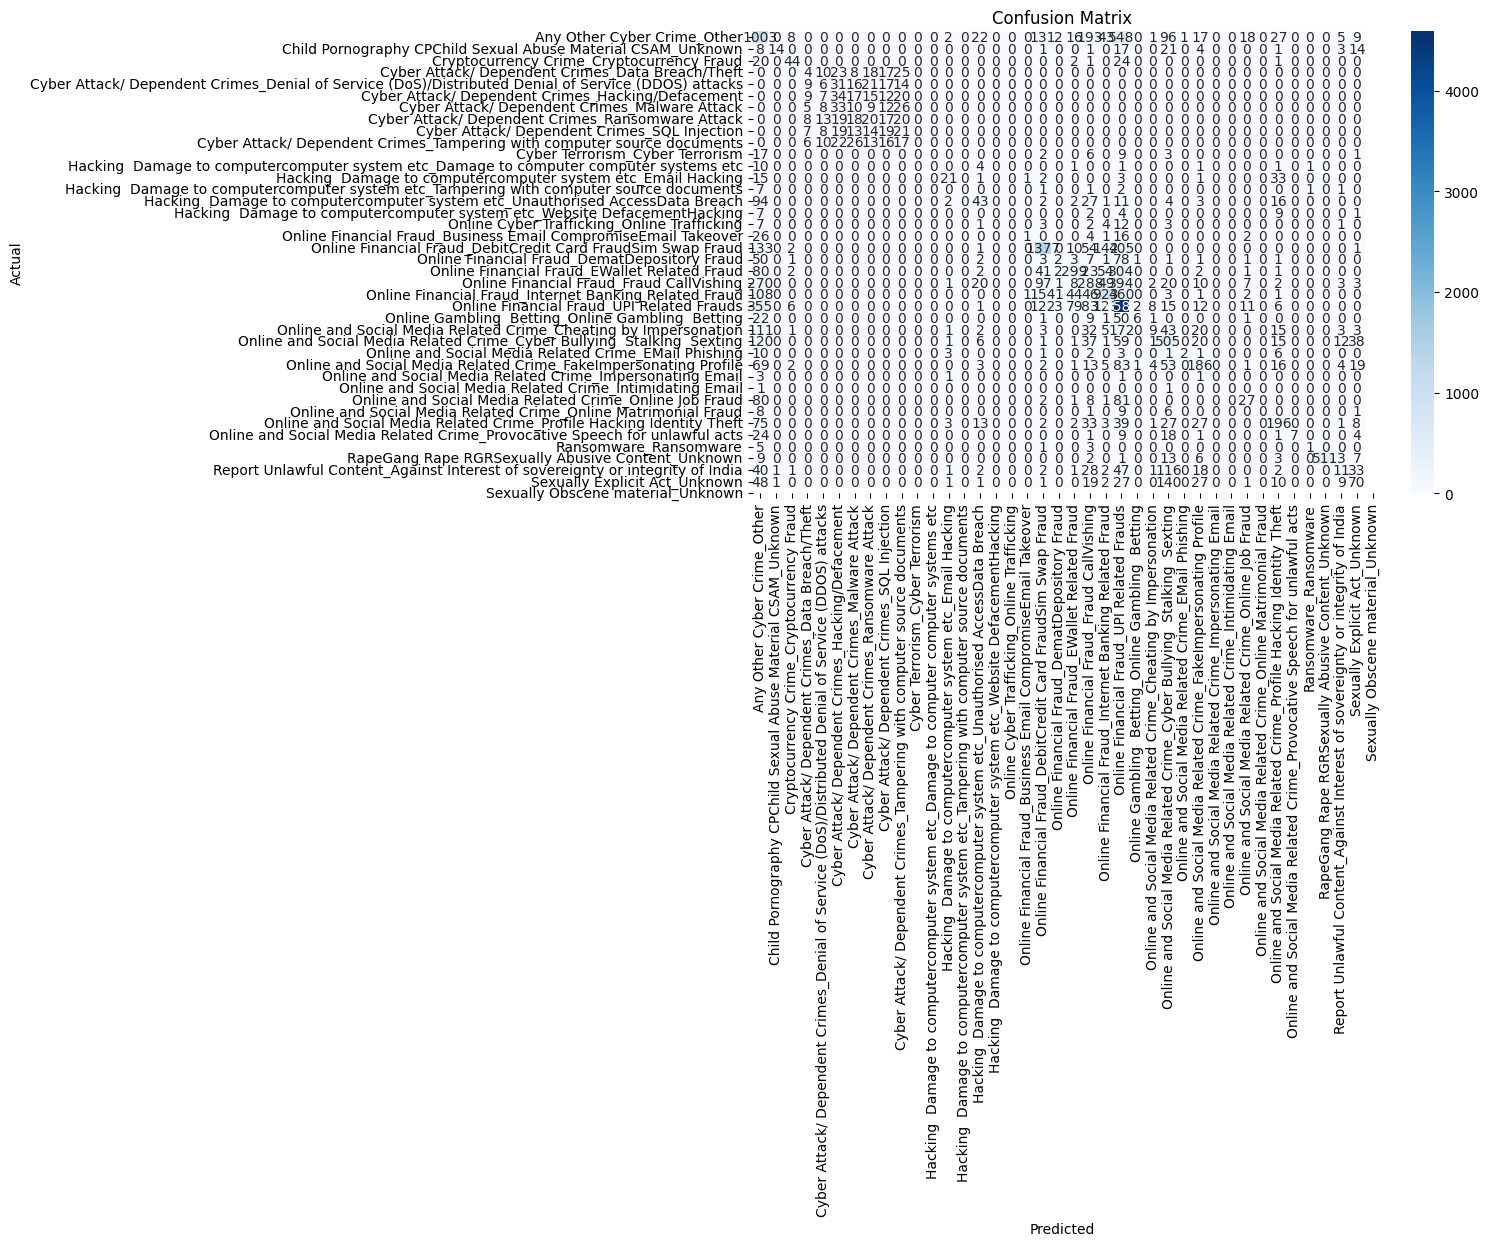

In [34]:
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [35]:
# Let's test with classification model with pipeline

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# Define the models
models = [
    ("Nearest Neighbors", KNeighborsClassifier()),
    ("Linear SVM", SVC(kernel="linear")),
    ("RBF SVM", SVC(kernel="rbf")),
    ("Gaussian Process", GaussianProcessClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Net", MLPClassifier(max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier()),
    ("Naive Bayes", MultinomialNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]

# Split the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)

# Store results for each model
model_names = []
model_accuracies = []
model_classification_reports = {}

# Train and evaluate each model
for name, model in models:
    print(f"Training {name}...")

    # Step 5: Check if model requires dense input, and convert if necessary
    if model.__class__.__name__ in ['GaussianProcessClassifier', 'QuadraticDiscriminantAnalysis']:
        X_train = X_train.toarray()
        X_test = X_test.toarray()

    # Train the model
    model.fit(X_train, Y_train)

    # Make predictions
    Y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(Y_test, Y_pred)
    model_names.append(name)
    model_accuracies.append(accuracy)

    # Store detailed classification report
    report = classification_report(Y_test, Y_pred, output_dict=True)
    model_classification_reports[name] = report
    print(f"\nSummary for {name}:\n")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print("Classification Report:")
    print(f"Precision, Recall, F1-Score:\n{report['macro avg']}")
    print(f"Details per class:\n{report}")

# Step 3: Visualize Model Performance

# Plot bar chart of accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=model_accuracies, palette="viridis")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# Step 4: Print Detailed Summary for Each Model
# for name, report in model_classification_reports.items():
#     print(f"\nSummary for {name}:\n")
#     print(f"Accuracy: {model_accuracies[model_names.index(name)] * 100:.2f}%")
#     print("Classification Report:")
#     print(f"Precision, Recall, F1-Score:\n{report['macro avg']}")
#     print(f"Details per class:\n{report}")



Training Nearest Neighbors...


C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training Linear SVM...


C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training RBF SVM...


C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kalpa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Training Gaussian Process...


MemoryError: Unable to allocate 41.8 GiB for an array with shape (74932, 74932) and data type float64

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Importing all the necessary models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

def testing(df, model):
    """
    This function trains and evaluates a classification model on the provided dataset.
    
    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing 'category', 'sub_category', and 'crimeaditionalinfo'.
    - model (sklearn model): The model to be trained and evaluated.

    Returns:
    - dict: Contains accuracy, precision, recall, and f1-score.
    """
    
    # Step 1: Preprocess the data
    
    # Combine category and sub_category into a single target variable
    df['category_subcategory'] = df['category'] + '_' + df['sub_category']
    
    # Define X (features) and Y (target)
    X = df['crimeaditionalinfo']
    Y = df['category_subcategory']
    
    # Step 2: Convert text data (crimeaditionalinfo) into feature vectors using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(X)
    
    # Step 3: Encode the target labels (category_subcategory) to numeric values
    label_encoder = LabelEncoder()
    Y_encoded = label_encoder.fit_transform(Y)
    
    # Step 4: Split the data into training and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size=0.2, random_state=42)
    
    # Step 5: Train the model
    model.fit(X_train, Y_train)
    
    # Step 6: Make predictions on the test set
    Y_pred = model.predict(X_test)
    
    # Step 7: Calculate the evaluation metrics
    accuracy = accuracy_score(Y_test, Y_pred)
    report = classification_report(Y_test, Y_pred, target_names=label_encoder.classes_, output_dict=True)
    
    # Extract precision, recall, f1-score, and support for each class
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']
    
    # Return the metrics in a dictionary
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score
    }

# List of models
models = [
    ("Nearest Neighbors", KNeighborsClassifier()),
    ("Linear SVM", SVC(kernel="linear")),
    ("RBF SVM", SVC(kernel="rbf")),
    ("Gaussian Process", GaussianProcessClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Neural Net", MLPClassifier(max_iter=1000)),
    ("AdaBoost", AdaBoostClassifier()),
    ("Naive Bayes", MultinomialNB()),
    ("QDA", QuadraticDiscriminantAnalysis())
]

# Assuming you already have your df loaded
# You can replace `df` with your actual DataFrame

# Create a dictionary to store results
results = {}

# Loop through each model and evaluate using the `testing()` function
for model_name, model in models:
    print(f"Evaluating model: {model_name}")
    result = testing(df, model)
    results[model_name] = result
    print(f"Results for {model_name}:")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1_score']}\n")

# Optionally, convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print("All model performance results:")
print(results_df)


In [ ]:
# Predictiong using models
from sklearn.preprocessing import LabelEncoder
import pandas as pd

def predict_category_subcategory(df, model, label_encoder, vectorizer):
    """
    This function predicts the 'category' and 'sub_category' based on 'crimeaditionalinfo'
    using the provided model.

    Parameters:
    - df (pandas.DataFrame): The input DataFrame containing 'crimeaditionalinfo'.
    - model (sklearn model): The trained model to predict the category_subcategory.
    - label_encoder (LabelEncoder): The LabelEncoder used to encode category_subcategory labels.
    - vectorizer (TfidfVectorizer): The TF-IDF vectorizer used to transform 'crimeaditionalinfo'.

    Returns:
    - pandas.DataFrame: DataFrame with 'category', 'sub_category', and 'crimeaditionalinfo'.
    """

    # Step 1: Transform the crimeaditionalinfo column into feature vectors using the provided vectorizer
    X = vectorizer.transform(df['crimeaditionalinfo'])

    # Step 2: Predict the category_subcategory (encoded)
    y_pred_encoded = model.predict(X)

    # Step 3: Decode the predictions to get the original category_subcategory
    category_subcategory_pred = label_encoder.inverse_transform(y_pred_encoded)

    # Step 4: Split the category_subcategory into separate category and sub_category
    category, sub_category = zip(*[item.split('_', 1) for item in category_subcategory_pred])

    # Step 5: Create a new DataFrame with category, sub_category, and crimeaditionalinfo
    result_df = pd.DataFrame({
        'category': category,
        'sub_category': sub_category,
        'crimeaditionalinfo': df['crimeaditionalinfo']
    })

    return result_df

# Example usage:
# Assuming you have a dataframe 'df', a trained model 'logreg_model', a fitted 'label_encoder', 
# and a fitted 'vectorizer' for TF-IDF transformation:

# result_df = predict_category_subcategory(df, logreg_model, label_encoder, vectorizer)
# print(result_df.head())
